This is the the example where Markov Blanket Shapley Values is tested on a small Linear Gaussian case!
The graph and the example are detailed in ``incorporating information into Shapley Values: Reweighting via Maximum Entropy Approach"

In [2]:
import pandas as pd
import numpy as np
from itertools import combinations
from shap import Explanation
import sys
from sklearn.linear_model import LinearRegression
import math
import shap
import time
import itertools
from weighted_shapley import Weighted_Shapley
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

Synthesizing data

In [3]:
x1 =np.random.normal(0, 1, size=(10000, 1)) 
x2 = 0.707 *np.random.normal(0, 1, size=(10000, 1)) + 0.707*x1
x3 = np.random.normal(0, 1, size=(10000, 1)) 
x5 = 0.707 * np.random.normal(0, 1, size=(10000, 1)) + 0.707 * x3
x9 = 0.5 * np.random.normal(0, 1, size=(10000, 1)) + 0.5 * x2  + 0.5 * x3
x7 = 0.57 * np.random.normal(0, 1, size=(10000, 1)) + 0.57 * x5 + 0.57 * x9
x8 = 0.707 * np.random.normal(0, 1, size=(10000, 1)) + 0.707 * x9
x4 = np.random.normal(0, 1, size=(10000, 1))
x6 = 0.57 * np.random.normal(0, 1, size=(10000, 1)) + 0.57 * x4 + 0.57 * x9
arr = np.hstack((x1, x2, x3, x4, x5, x6, x7, x8, x9))
pd_data = pd.DataFrame(arr, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', "x8", "x9"])
pd_data = (pd_data-pd_data.mean())/pd_data.std()
X = pd_data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', "x8"]]
y = pd_data["x9"]
feature_num = 8

In [4]:
print(y.mean())

2.5579538487363606e-17


The function we want to explain is a linear regression model. This is a toy example to show how this algorithm works

In [5]:
lr = LinearRegression()
lr.fit(X, y)
w = lr.coef_[0]

In [6]:
print(f' the coefs of this trained linear regression model are \n{lr.coef_}')

 the coefs of this trained linear regression model are 
[ 0.01342363  0.31648013  0.32864676 -0.16143994 -0.16833447  0.27422974
  0.30550801  0.22361416]


In [7]:
import itertools
#to create the oracle:
#we create a dictionary that maps each feature to a set of sets of features that d-separate the variable from X_[n+1]
#nodes that are directly connected to X_{n+1} can not be d-separated from X_{n+1} by any set of nodes thus the set of sets is empty
#for other nodes we  need to identify all such sets
#for node X1 (for the example in the supplementary material) all subsets of variables that include X_2 d-separate it from X_[9]

oracle = {}
s = ['x3', 'x4', 'x5', 'x6', 'x7', 'x8']
all_subsets = [subset for i in range(len(s)+1) for subset in itertools.combinations(s, i)]
def findsubsets(s, n):
    return list(itertools.combinations(s, n))
sets = {frozenset({'x2'}.union(set(s))) for s in all_subsets}
oracle['x1'] = sets

#X2 and X3 are directly connected to X9 thus the set of sets is empty
oracle['x2'] = set()
oracle['x3'] = set()

#for X_5, the sets that d-separate it from X_9 must include X_3 and exclude X_7. (so that all paths are deactivated)
s = ['x1', 'x2', 'x4', 'x6', 'x8']
all_subsets = [subset for i in range(len(s)+1) for subset in itertools.combinations(s, i)]
def findsubsets(s, n):
    return list(itertools.combinations(s, n))
sets = {frozenset({'x3'}.union(set(s))) for s in all_subsets}
oracle['x5'] = sets
#X_7 and X_8 and X_6 are directly connected to X_9 thus the set of sets is empty
oracle['x7'] = set()
oracle['x8'] = set()
oracle['x6'] = set()


#For X_4 the sets that d-separate it from X_9 must not contain the node X_6
s = ['x1', 'x2', 'x3', 'x5', 'x7', 'x8']
all_subsets = [subset for i in range(len(s)+1) for subset in itertools.combinations(s, i)]
def findsubsets(s, n):
    return list(itertools.combinations(s, n))
sets = {frozenset(set(s)) for s in all_subsets}
oracle['x4'] = sets




We choose a data point to explain the prediction:

In [8]:
print(f'data point is {X.iloc[0]}\n and f is {lr.predict(X.iloc[0].values.reshape(1, -1))}')

data point is x1    1.804856
x2    1.124896
x3    0.336618
x4   -1.877362
x5    0.498167
x6   -0.938194
x7    0.171046
x8   -0.997256
Name: 0, dtype: float64
 and f is [0.28206052]


In [9]:
from weighted_shapley import Weighted_Shapley
sh = Weighted_Shapley(X, y, lr, feature_num)
standard, markov, sparsest = sh.find_shapley(X.iloc[0], explanation_type="markov blanket/sparsest/standard", sparsest_oracle=oracle)

#b = sh.find_shapley(X.iloc[3], explanation_type="sparsest", sparsest_oracle=oracle)

we are at order number 1000
we are at order number 2000
we are at order number 3000
we are at order number 4000
we are at order number 5000
we are at order number 6000
we are at order number 7000
we are at order number 8000
we are at order number 9000
we are at order number 10000
we are at order number 11000
we are at order number 12000
we are at order number 13000
we are at order number 14000
we are at order number 15000
we are at order number 16000
we are at order number 17000
we are at order number 18000
we are at order number 19000
we are at order number 20000
we are at order number 21000
we are at order number 22000
we are at order number 23000
we are at order number 24000
we are at order number 25000
we are at order number 26000
we are at order number 27000
we are at order number 28000
we are at order number 29000
we are at order number 30000
we are at order number 31000
we are at order number 32000
we are at order number 33000
we are at order number 34000
we are at order number 

In [24]:
shap.waterfall_plot(standard)

NameError: name 'a' is not defined

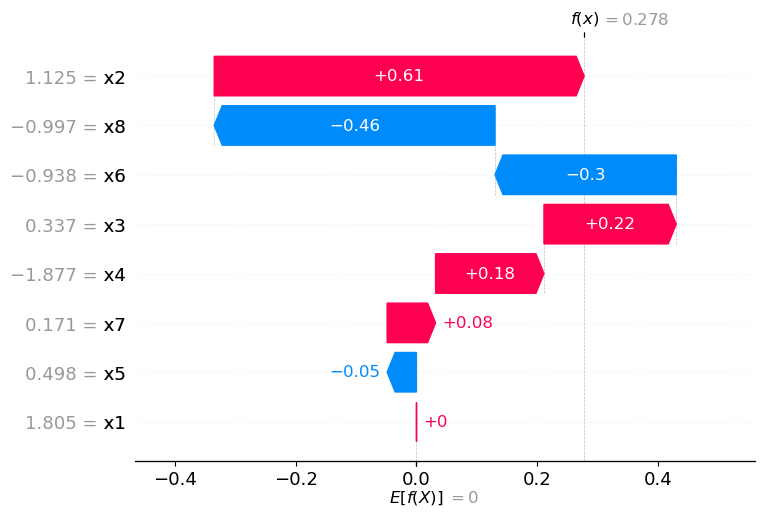

In [10]:
shap.waterfall_plot(markov)

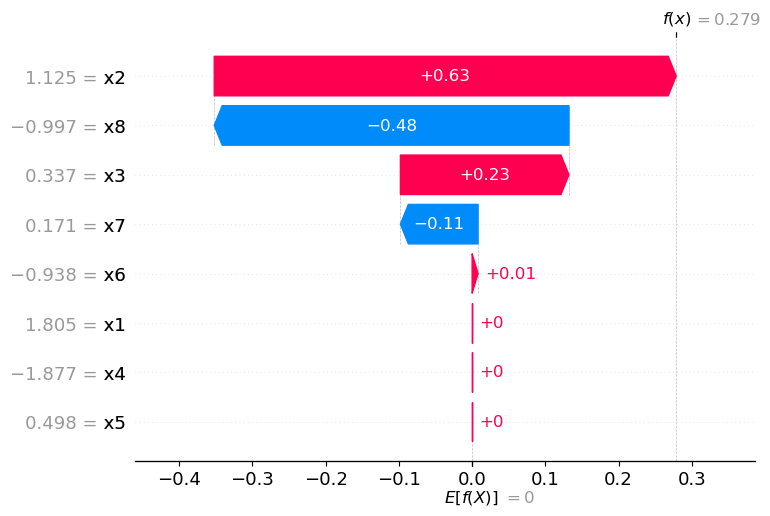

In [11]:
shap.waterfall_plot(sparsest)

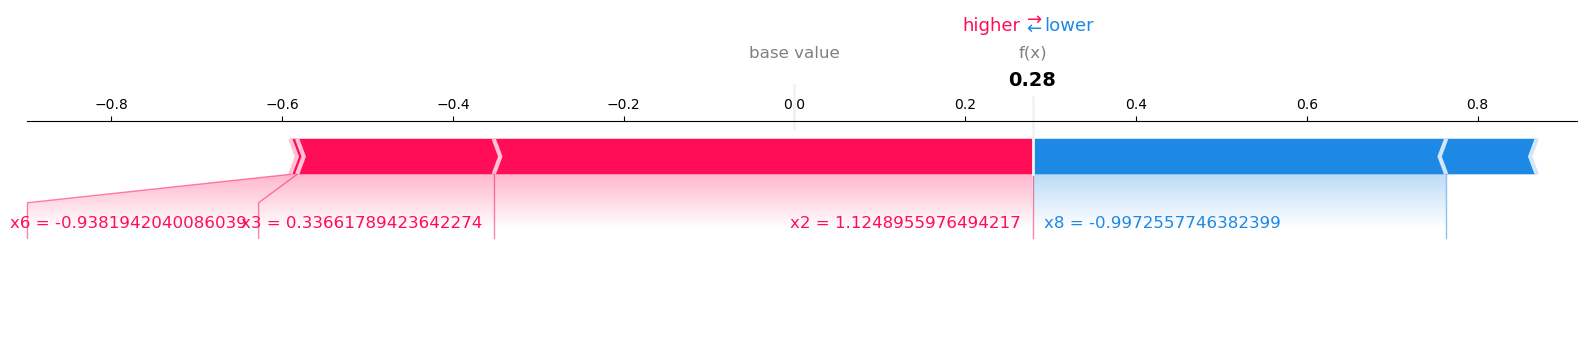

In [21]:
shap.initjs()
shap.force_plot(sparsest, X.iloc[0], matplotlib=True, show=False, contribution_threshold=0.0)

In [9]:
s = [ 'x3', 'x4']
all_subsets = [subset for i in range(len(s)+1) for subset in itertools.combinations(s, i)]
def findsubsets(s, n):
    return list(itertools.combinations(s, n))
oracle = {}
sets = {frozenset({'x2'}.union(set(s))) for s in all_subsets}
print(sets)
x22 = {frozenset({'x2'})}
oracle['x5'] = sets.union(x22)

{frozenset({'x2'}), frozenset({'x4', 'x2'}), frozenset({'x3', 'x2'}), frozenset({'x4', 'x3', 'x2'})}


In [10]:
s = [ 'x3', 'x4', 'x1']
all_subsets = [subset for i in range(len(s)+1) for subset in itertools.combinations(s, i)]
def findsubsets(s, n):
    return list(itertools.combinations(s, n))
oracle = {}
sets = {frozenset({'x2'}.union(set(s))) for s in all_subsets}
oracle['x5'] = sets

Faster version of Markov Blanket Shapley values

In [8]:
from weighted_shapley import Weighted_Shapley
sh = Weighted_Shapley(X, y, lr, feature_num)
mb = sh.mb_elements(X.iloc[0], oracle)

In [9]:
mb

['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']